# Train Test Drift

In [1]:
import numpy as np
import pandas as pd

from deepchecks import Dataset
from deepchecks.checks import TrainTestDrift

## Generate data

In [2]:
np.random.seed(42)

train_data = np.concatenate([np.random.randn(1000,2), np.random.choice(a=['apple', 'orange', 'banana'], p=[0.5, 0.3, 0.2], size=(1000, 2))], axis=1)
test_data = np.concatenate([np.random.randn(1000,2), np.random.choice(a=['apple', 'orange', 'banana'], p=[0.5, 0.3, 0.2], size=(1000, 2))], axis=1)

df_train = pd.DataFrame(train_data, columns=['numeric_without_drift', 'numeric_with_drift', 'categorical_without_drift', 'categorical_with_drift'])
df_test = pd.DataFrame(test_data, columns=df_train.columns)

df_train = df_train.astype({'numeric_without_drift': 'float', 'numeric_with_drift': 'float'})
df_test = df_test.astype({'numeric_without_drift': 'float', 'numeric_with_drift': 'float'})


In [3]:
df_train.head()

,numeric_without_drift,numeric_with_drift,categorical_without_drift,categorical_with_drift
0,0.496714,-0.138264,apple,apple
1,0.647689,1.523030,apple,apple
2,-0.234153,-0.234137,banana,banana
3,1.579213,0.767435,apple,banana
4,-0.469474,0.542560,orange,apple


### Insert drift into test:

In [4]:
df_test['numeric_with_drift'] = df_test['numeric_with_drift'].astype('float') + abs(np.random.randn(1000)) + np.arange(0, 1, 0.001) * 3
df_test['categorical_with_drift'] = np.random.choice(a=['apple', 'orange', 'banana', 'lemon'], p=[0.5, 0.25, 0.15, 0.1], size=(1000, 1))

## Run check

In [5]:
train_dataset = Dataset(df_train)
test_dataset = Dataset(df_test)

Automatically inferred these columns as categorical features: categorical_without_drift, categorical_with_drift. 

Automatically inferred these columns as categorical features: categorical_without_drift, categorical_with_drift. 



Train Test Drift

Calculate drift between train dataset and test dataset

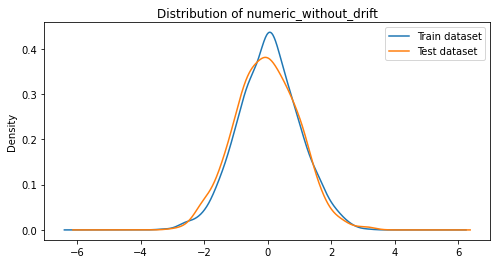

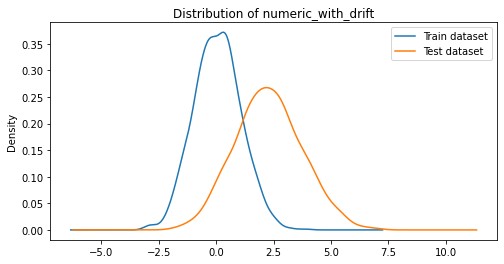

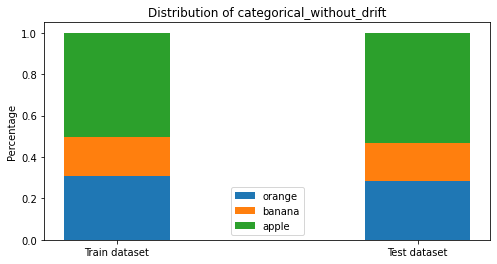

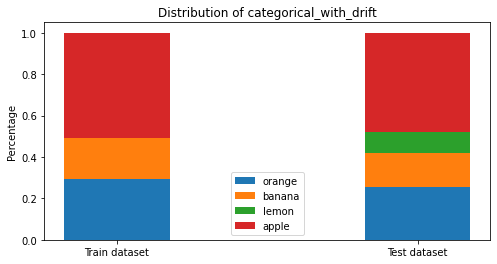

In [6]:
check = TrainTestDrift()
result = check.run(train_dataset=train_dataset, test_dataset=test_dataset)
result